In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np

In [ ]:
#Рассчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. 

In [2]:
a=pd.read_csv('ads/ads_clients_data.csv')

In [3]:
b=pd.read_csv('ads/ads_data.csv')

In [4]:
a.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [5]:
b.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [29]:
c=b.groupby(['ad_id', 'event'], as_index=False).agg({'time':'count'}).rename(columns={'time':'number'})

In [37]:
c.head()

,ad_id,event,number
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1


In [31]:
#преобразуем в пивот тэйбл
d=c.pivot(index='ad_id', columns='event', values='number').reset_index()

In [35]:
d.head()

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0


In [33]:
#пропущенные значения по кликам заменяем на 0
d['click']=d.click.fillna(0)

In [36]:
d.head()

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0


In [41]:
d.mean().round()

event
ad_id    57971.0
click      113.0
view       932.0
dtype: float64

In [42]:
np.log(d.view)

0      4.615121
1      5.214936
2      3.713572
3      3.555348
4      4.060443
         ...   
960    4.605170
961    5.049856
962    4.219508
963    4.927254
964    3.737670
Name: view, Length: 965, dtype: float64

In [44]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='view', ylabel='Density'>

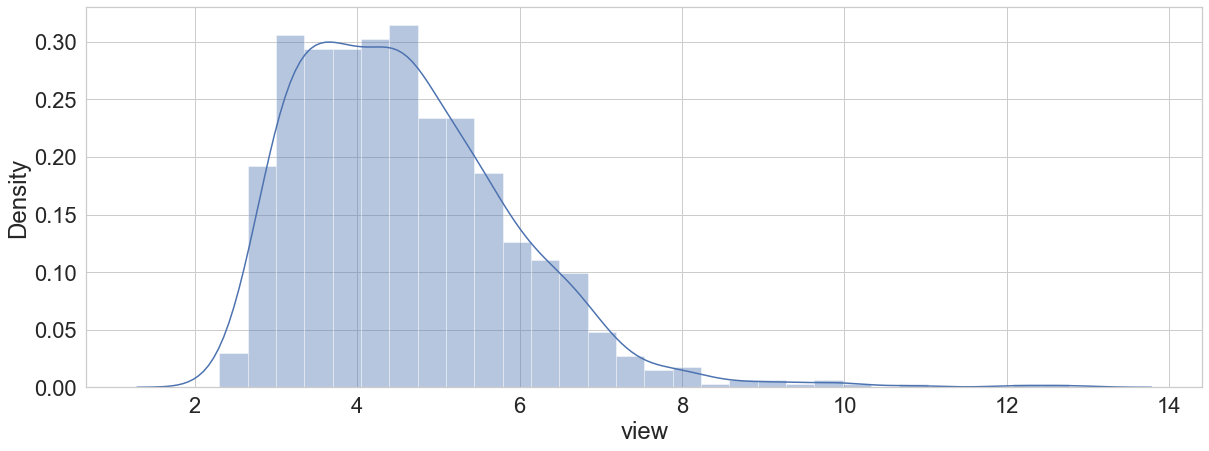

In [45]:
#распределение по просмотрам (логарифм)
sns.distplot(np.log(d.view))

In [ ]:
#Найдем среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, 
#у которых не было показов (обычное среднее). 
#После этого посчитем скользящее среднее по полученному результату с окном в 2 элемента.
#Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлить ответ до целого числа.



In [48]:
b.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [59]:
b.query("event=='view'").groupby(['ad_id', 'date'], as_index=False).agg({'event':'count'}).head()

,ad_id,date,event
0,2,2019-04-01,83
1,2,2019-04-02,18
2,3,2019-04-01,158
3,3,2019-04-02,26
4,1902,2019-04-03,34


In [68]:
#среднее кол-во просмотров по дням
df=b.query("event=='view'").groupby(['ad_id', 'date'], as_index=False)\
.agg({'event':'count'}).groupby('date', as_index=False).agg({'event':'mean'})

In [71]:
df

,date,event
0,2019-04-01,154.482270
1,2019-04-02,137.786982
2,2019-04-03,163.952778
3,2019-04-04,675.901720
4,2019-04-05,919.109677
5,2019-04-06,277.122727


In [72]:
#скользящее среднее
df['rolling']=df.event.rolling(window=2).mean()

In [73]:
df

,date,event,rolling
0,2019-04-01,154.482270,NaN
1,2019-04-02,137.786982,146.134626
2,2019-04-03,163.952778,150.869880
3,2019-04-04,675.901720,419.927249
4,2019-04-05,919.109677,797.505699
5,2019-04-06,277.122727,598.116202


In [ ]:
#Сравним графики значения просто среднего количества показов по дням и 
#скользящего среднего 

# в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? 
#Дни, в которых скользящее среднее равно NaN, не учитываем. 

In [81]:
df['otklonenie']=(df['event']-df['rolling']).abs()

In [82]:
df

,date,event,rolling,otklonenie
0,2019-04-01,154.482270,NaN,NaN
1,2019-04-02,137.786982,146.134626,8.347644
2,2019-04-03,163.952778,150.869880,13.082898
3,2019-04-04,675.901720,419.927249,255.974471
4,2019-04-05,919.109677,797.505699,121.603979
5,2019-04-06,277.122727,598.116202,320.993475


df.max()

In [83]:
#наибольшее отклонение  - 2019-04-06
df.otklonenie.max()

320.9934750733138

<AxesSubplot:xlabel='date', ylabel='event'>

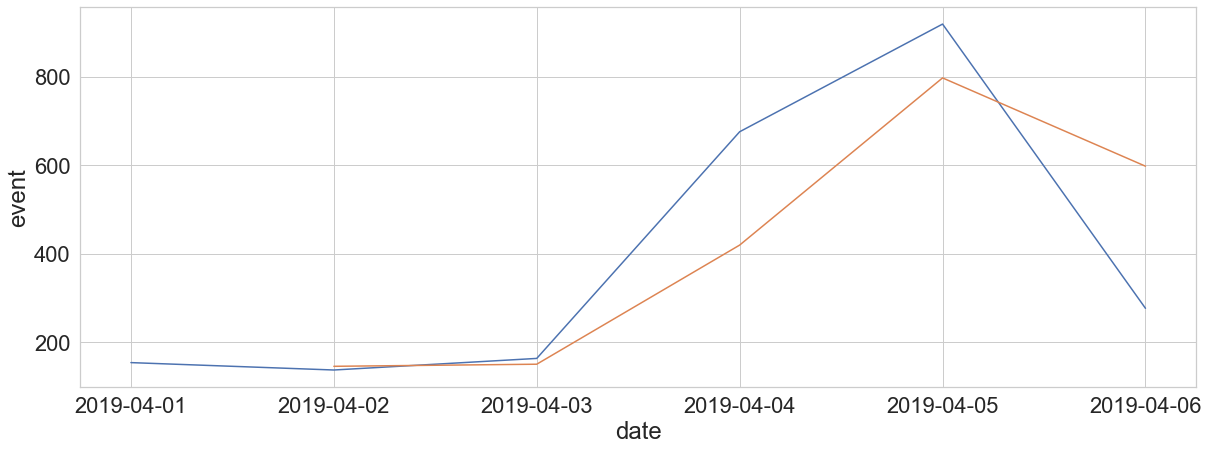

In [87]:
sns.lineplot( x='date', y='event', data=df)
sns.lineplot( x='date', y='rolling', data=df)

In [ ]:
#Объединим данные рекламы с данными о рекламных клиентах и найдем среднее количество дней 
#от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).


In [166]:
c=a.merge(b, on='client_union_id')

In [167]:
c.head()

,date_x,client_union_id,community_id,create_date,date_y,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035


In [247]:
c['create_date']=pd.to_datetime(c['create_date'])

In [248]:
c['date_y']=pd.to_datetime(c['date_y'])

In [249]:
c['diff']=(c.create_date-c.date_y).abs()

In [250]:
c.head()

,date_x,client_union_id,community_id,create_date,date_y,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,diff
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035,98 days
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035,98 days
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035,98 days
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035,98 days
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035,98 days


In [311]:
c.groupby(['client_union_id'], as_index=False).agg({'diff':'min'}).mean()
#среднее количество дней 
#от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом - 124 дня

client_union_id                   47921.434368
diff               124 days 09:04:43.532219570
dtype: object

In [312]:
#вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

In [313]:
import datetime

In [314]:
df=c.groupby(['client_union_id'], as_index=False).agg({'diff':'min'})

In [315]:
df.head()

,client_union_id,diff
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days


In [316]:
t=pd.to_timedelta(365, unit='day')

In [317]:
t

Timedelta('365 days 00:00:00')

In [323]:
df[df['diff'] < pd.Timedelta(365, unit='day')]

,client_union_id,diff
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [218]:
a.client_union_id.nunique()

122078

In [ ]:
# Ответ 0,69% (838/122078)

In [ ]:
#разобъем клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

#Определим, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
#Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365].
#Создадим временные промежутки с помощью pd.to_timedelta().

In [300]:
df['interval']=pd.cut(df['diff'], bins=[pd.to_timedelta('0d'), pd.to_timedelta('30d'), pd.to_timedelta('90d'), pd.to_timedelta('180d'), pd.to_timedelta('365d')], labels=['less than 1 month', '1-3month', '3-6 month', '6-12 month'])

In [301]:
df.head()

,client_union_id,diff,categorical,interval
0,1,98 days,"(25 days 18:36:00, 101 days 00:00:00]",3-6 month
1,9,114 days,"(101 days 00:00:00, 176 days 00:00:00]",3-6 month
2,13,66 days,"(25 days 18:36:00, 101 days 00:00:00]",1-3month
3,16,105 days,"(101 days 00:00:00, 176 days 00:00:00]",3-6 month
4,20,32 days,"(25 days 18:36:00, 101 days 00:00:00]",1-3month


In [302]:
df.interval.value_counts()

3-6 month            396
1-3month             263
6-12 month           168
less than 1 month     11
Name: interval, dtype: int64

In [ ]:
# Ответ: 11 клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).